 ## <center>Practicing Machine Learning</center>
### <center>Optimization Algorithms: </center>
#### <center>Gradient Descent </center>
##### <center> Recommended Source: <a href="https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_fkmr1_1?__mk_es_US=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2Y7BISU0SQYCV&keywords=hand+son+machine+learning+tensorflow+keras&qid=1664596219&qu=eyJxc2MiOiIwLjkzIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=hand+son+machine+learning+tensorflow+keras%2Caps%2C105&sr=8-1-fkmr1">Link</a></center>

GD is capable of finding optimal solutions to a wide range of problems by tweaking parameters iteratively in order to minimize a cost function.

GD actually works finding the steepest slope (directional derivative) and following it until it reaches 0 which is the minimum value or optimal value of the error. Let's do an exercise to demonstrate how GD works.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We first define a cost function to optimize, for this I chose MSE since it is used widely in regression.

In [ ]:
# Define the cost function to be optimized in this case it's MSE
def f(x):
    return 0.5*(x-3)**2 + 2

# Define the derivative of the cost function
def df(x):
    return x - 3

GD is defined as an iterative process that takes an initial value and in every iteration calculates the derivative to find the slope and then moves in that direction by the following formula:
$$X = X - Lr * \frac{d}{dx} F(x)$$

where:
<div>
     <li>"$X$" represents the predicted value</li>
     <li>"$Lr$" represents the Learning Rate</li>
     <li>"$\frac{d}{dx} F(x)$" represents is the slope of the cost function</li>

</div>

In [ ]:
# Define the gradient descent function
def gradient_descent(x0, learning_rate, num_iterations):
    x = x0
    x_history = [x]
    for i in range(num_iterations):
        # Compute the gradient
        gradient = df(x)
        # Update x using the gradient and learning rate
        x = x - learning_rate * gradient
        # Add x to the history
        x_history.append(x)
    return x_history

Now that we have our definitions straightened out let's apply GD to our cost functions and plot the resulting iterations on top of the cost function using a learning_rate of 0.5

Mean Squared Error: 7.099748146989106e-30


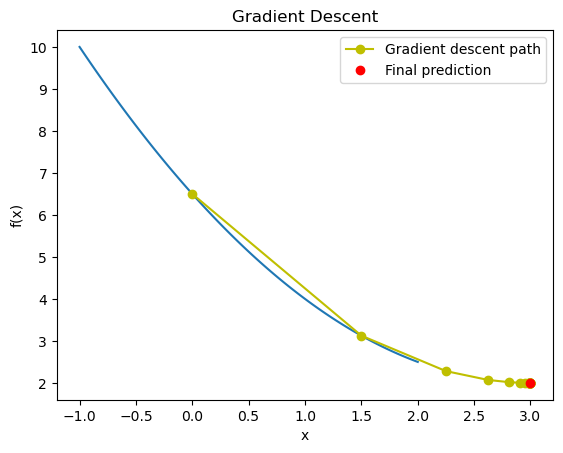

In [34]:
# set a mock true value
x_true = 3
# Apply GD
learning_rate=0.5
x_history = gradient_descent(0, learning_rate, 50)
# Get predicted values
x_pred = x_history[-1]

# Compute the MSE using numpy
mse = np.mean((x_true - x_pred)**2)

print("Mean Squared Error:", mse)

# Plot the function and the path of gradient descent
x = np.linspace(-1, 2, 100)
y = f(x)
plt.plot(x, y)
plt.plot(x_history, f(np.array(x_history)), 'yo-', label='Gradient descent path')
plt.plot(x_pred, f(x_pred), 'ro', label='Final prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.show()


The GD for the MSE function trying to predict a value of 3 gave us great results but what if we want to use a higher learning rate to have less iterations will we achieve as good of a result?

Mean Squared Error: 0.0


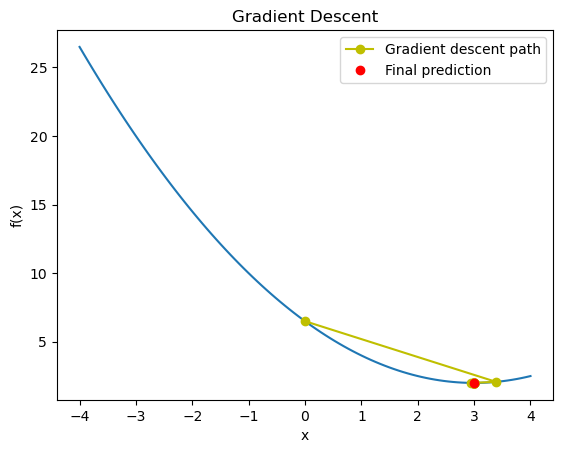

In [38]:
# set a mock true value
x_true = 3
# Apply GD
learning_rate=1.13

x_history = gradient_descent(0, learning_rate, 50)
# Get predicted values
x_pred = x_history[-1]

# Compute the MSE using numpy
mse = np.mean((x_true - x_pred)**2)

print("Mean Squared Error:", mse)

# Plot the function and the path of gradient descent
x = np.linspace(-4, 4, 100)
y = f(x)
plt.plot(x, y)
plt.plot(x_history, f(np.array(x_history)), 'yo-', label='Gradient descent path')
plt.plot(x_pred, f(x_pred), 'ro', label='Final prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.show()

As you can se we only needed 3 steps before it was complete but the actual value is a lot more skewed than the previous one, the learning rate adjusts how much we jump between values but if it's too high we might get undesired behavior as seen above. Let's check out a much lower learning rate and compare graphs.

Mean Squared Error: 0.05328476298300638


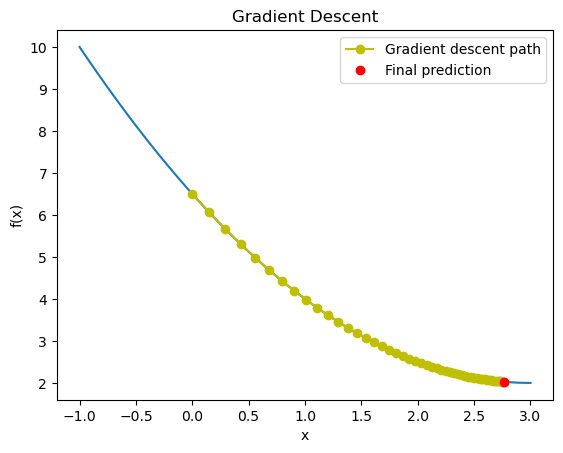

In [41]:
# set a mock true value
x_true = 3
# Apply GD
learning_rate=0.05
x_history = gradient_descent(0, learning_rate, 50)
# Get predicted values
x_pred = x_history[-1]

# Compute the MSE using numpy
mse = np.mean((x_true - x_pred)**2)

print("Mean Squared Error:", mse)

# Plot the function and the path of gradient descent
x = np.linspace(-1, 3, 100)
y = f(x)
plt.plot(x, y)
plt.plot(x_history, f(np.array(x_history)), 'yo-', label='Gradient descent path')
plt.plot(x_pred, f(x_pred), 'ro', label='Final prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.show()


if the learning rate has a low value the algorithm will make more steps which is more demanding in computations.

### Batch Gradient Descent

GD computes in every iteration the partial derivative of the cost function individually which is computationally demanding, Batch GD computes them all using linear algebra into the **Gradient Vector of the Cost Function**, this involves calculations over the full training set at once which is why it is called **Batch GD**. Very good on small datasets but it's terribly slow on big datasets

$$\nabla_\theta MSE(\theta) = \begin{pmatrix} \frac{\partial MSE(\theta)}{\partial \theta_0} \\ \frac{\partial MSE(\theta)}{\partial \theta_1} \\ \vdots \\ \frac{\partial MSE(\theta)}{\partial \theta_n} \end{pmatrix} = \frac{2}{m}  \mathbf{X}^\top  (\mathbf{X} \cdot \theta - \mathbf{y})$$


where:
<div>
     <li>"$\nabla_\theta$" represents the gradient of the MSE Vector</li>
     <li>"$Lr$" represents the Learning Rate</li>
     <li>"$\frac{d}{d\theta_n} MSE(\theta)$" represents is the slope of the cost function in a particular step</li>

</div>

In [46]:
eta = 0.1 #lr
n_iterations = 1000
m = 100
X = 2 * np.random.randn(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.18577148],
       [2.92354653]])

### Stochastic Gradient Descent

The main problem of batch GD is that it uses the whole training set to compute the gradients at every step which makes it super slow on huge datasets. Stochastic GD picks a random instance in the training set at every step and computes the gradients based only on that single instance, this makes it much faster since we are doing fewer computations. On the other hand due to its Stochastic(random) nature, this algorithm is much less regular than batch GD since instead of decreasing until it reaches the minimum it will bounce up and down, decreasing only on an average. This alg orithm is good but once the bouncing stops the final parameters are good but not optimal.

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so SGD has a better chance of finding the global minimum. Randomness is a great escape from the local minima but also this algorithm will never settle at the minimum. One solution is to lower gradually the learning rate, this process is called **simulated annealing** the function that determines the learning rate at each iteration is called **learning schedule**


Now let's dive into it's implementation in python

In [49]:
n_epochs = 50
t0,t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.22014338],
       [2.9833602 ]])

Now lets use the SGDRegressor available on SKLearn

In [50]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15102572]), array([2.83758543]))